In [1]:
pip install scikit-learn

In [2]:
# Library imports.
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB # ?
from sklearn.naive_bayes import MultinomialNB # ?
from sklearn.model_selection import train_test_split

In [3]:
# Dataset from Kaggle.
# https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health?resource=download

In [4]:
# For reading a "local" CSV using Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/Final Project/dataset/Combined_Data.csv") # keep an eye on whitespace?
dataset.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
dataset.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [7]:
# Make a safe copy of the CSV data for cleaning and processing later.
dataset_clean = dataset.copy()
dataset_clean.dropna(inplace = True)
# dataset_clean

In [8]:
dataset_clean.describe()

,Unnamed: 0
count,52681.000000
mean,26365.706042
std,15235.065306
min,0.000000
25%,13180.000000
50%,26350.000000
75%,39522.000000
max,53042.000000


In [9]:
# trying this to get the noisy characters like emojis out
import re # need?

def clean_statements(statement_text): # clean this up later
    # Handle potential encoding issues
    # text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove most punctuation and special characters
    # statement_text = re.sub(r'[^\w\s]', '', statement_text)

    # Remove punctuation, special characters, any remaining non-letter characters (?) and extra whitespace
    # statement_text = re.sub(r'[^a-zA-Z0-9\s]', '', statement_text)
    statement_text = re.sub(r'[^a-zA-Z\s]', '', statement_text)
    statement_text = re.sub(r'\s+', ' ', statement_text) # remove extra whitespace

    # Convert everything to lowercase and remove extra whitespace (?) (redundant with regex above? check)
    statement_text = statement_text.lower().strip() # need?
    return statement_text



In [10]:
# Example usage:
# noisy_text = dataset_clean["statement"][3527]
noisy_text = dataset_clean["statement"][352]

clean_text_result = clean_statements(noisy_text)

# print(dataset_clean["statement"][3527])
print(dataset_clean["statement"][352])
print(clean_text_result)

Usually every night when you're alone you're restless, it's calm. It feels so different.
usually every night when youre alone youre restless its calm it feels so different


In [11]:
# Take our cleaning function and apply it to all of the social media statements.
# Then temporarily make a new column for the cleaned statement for easier viewing.
dataset_clean['processed_statement'] = dataset_clean['statement'].apply(clean_statements)
dataset_clean.head()

,Unnamed: 0,statement,status,processed_statement
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...


In [12]:
# Let's see all the unique statuses.
dataset_clean["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [13]:
# Let's encode all of the statuses so that our models can work with them for classification.
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

# Temporarily just make a new column for the encoded mental health status for easier viewing.
dataset_clean["encoded_status"] = label_encode.fit_transform(dataset_clean["status"])
dataset_clean.head()

,Unnamed: 0,statement,status,processed_statement,encoded_status
0,0,oh my gosh,Anxiety,oh my gosh,0
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,0
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,0
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,0
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,0


In [14]:
# Encoded classes?
statuses = label_encode.classes_ # the string names
statuses

array(['Anxiety', 'Bipolar', 'Depression', 'Normal',
       'Personality disorder', 'Stress', 'Suicidal'], dtype=object)

In [15]:


# Get unique status values
unique_status = dataset_clean['status'].unique()
unique_status

# Showing which integer values in encoded_status correspond with the string value in status
matching_values = dataset_clean[dataset_clean['status'].isin(unique_status)][['status', 'encoded_status']].drop_duplicates()

# Print the 'cupcake' values
print(matching_values)

# dataset_clean.loc[dataset_clean['status'] == "Anxiety"]

# Create a boolean mask to select rows with unique status values
# mask = dataset_clean['status'].isin(unique_status_values)

# # Use the mask to select and print the targeted rows
# print(dataset_clean[mask].head())

                     status  encoded_status
0                   Anxiety               0
733                  Normal               3
6982             Depression               2
6985               Suicidal               6
27346                Stress               5
45394               Bipolar               1
50654  Personality disorder               4


In [16]:
# dataset_clean.head() # can I randomize the rows that come out to view different statuses more easily?
print(dataset_clean["statement"][22327])
print(dataset_clean["processed_statement"][22327]) # create a rule so that "standarts...Living" becomes "standarts living" instead of "standartsliving"? for row 22327
print(dataset_clean["status"][22327])
print(dataset_clean["encoded_status"][22327])

there were rules to which obeyed, standarts...Living in a charade thy was all. No real purpose can save you when you are mentally ill. I have OCD non responsive to meds. Everday I lose a part of my identity. Constant fight beetween two spheres of my brain. I was a star dust and I am ready and fulfilled in life to go back to where everthing started. I love my friend Yamur which is a mix of passion and love and charity. I can do anything for her if I had been healthy enough.I love my family too they matter a lot. But I can not tolerate my daily melancholic suicidal depression and obsessions just for the sake of them. The world has no rules on grand scale no justice no purpose. we have to distract our mind and create and illusion each second just to forget we exist. Yes we exist and this must be a bad joke. We are walking to the eventual death of us each day. Some of us only suffer while some of us can be happy in their distraction.For example the girl I loved we are texting only Ilove he

In [17]:
# Probably need to do some more preprocessing like removing stopwords and stemming/lemmatization but let's move on for now

In [18]:
#Tokenization
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# Split and train the data.
X = dataset_clean['processed_statement'] # feature
y = dataset_clean['encoded_status'] # target
# y = dataset_clean['status'] # target TRYING THIS

print("X:", len(X), " y:", len(y)) # 52681 52681, both

X: 52681  y: 52681


In [20]:
# Split and train the data, split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # change random_state? no?

# Checking shape of training and test sets really quick
print("X train:", len(X_train), "y train:",  len(y_train)) # correct?
print("X test:", len(X_test), "y test:", len(y_test))  # correct?

X train: 42144 y train: 42144
X test: 10537 y test: 10537


In [21]:
#Tokenization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = "english") # play with parameters later(?)

# Use CountVectorizer to transform our training data for features
X_vectorized_train = vectorizer.fit_transform(X_train)

# Use CountVectorizer to transform our testing data for features
X_vectorized_test = vectorizer.transform(X_test)

In [22]:
# Use the data we just prepared to fit and train a Dummy Classifier in order to obtain a common sense baseline, to be used to measure the models' performance.
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy='stratified', random_state = 42) # random_state = 42 ? same as when using train_test_split on my models

dummy_baseline.fit(X_vectorized_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

# Getting our common sense baseline from the Dummy Classifier
y_pred_baseline = dummy_baseline.predict(X_vectorized_test)
acc_baseline = accuracy_score(y_test, y_pred_baseline) # accuracy
f1_baseline = f1_score(y_test, y_pred_baseline, average="weighted") # f1 score, using average = 'weighted' because the target is multiclass
prec_baseline = precision_score(y_test, y_pred_baseline, average="weighted") # precision
recall_baseline = recall_score(y_test, y_pred_baseline, average="weighted") # recall

print("Dummy Classifier Baseline:\n")
print("Accuracy:", acc_baseline)
print("F1 Score:", f1_baseline)
print("Precision:", prec_baseline)
print("Recall:", recall_baseline)

Dummy Classifier Baseline:

Accuracy: 0.2346018790927209
F1 Score: 0.23484934694182893
Precision: 0.23513114743747132
Recall: 0.2346018790927209


In [24]:
# Naive Bayes
# Build the Naive Bayes classifier.
# nb_model = GaussianNB()
nb_model = MultinomialNB()

# Fit the model using the training set we prepared.
nb_model.fit(X_vectorized_train, y_train)

MultinomialNB()

In [25]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import f1_score

y_pred = nb_model.predict(X_vectorized_test)
acc_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred, average="weighted") # f1 score, using average = 'weighted' because the target is multiclass
prec_nb = precision_score(y_test, y_pred, average="weighted") # precision
recall_nb = recall_score(y_test, y_pred, average="weighted") # recall

print("Naive Bayes Classifier:\n")
print("Accuracy:", acc_nb)
print("F1 Score:", f1_nb)
print("Precision:", prec_nb)
print("Recall:", recall_nb)

Naive Bayes Classifier:

Accuracy: 0.643446901395084
F1 Score: 0.6433112494981602
Precision: 0.7097631284509737
Recall: 0.643446901395084


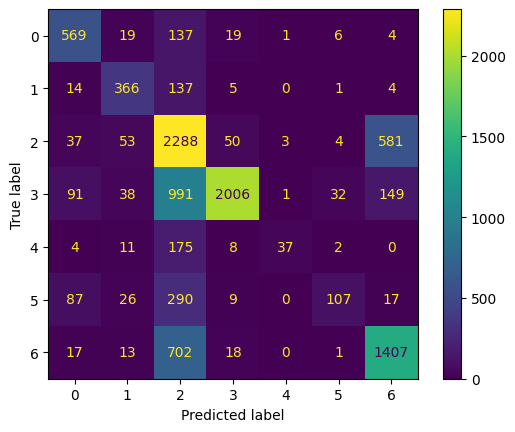

In [26]:
# Naive Bayes confusion matrix
from sklearn import metrics # repeat?
import matplotlib.pyplot as plt
# import seaborn as sns

matrix_labels = matching_values["encoded_status"] # need to fix!

# nb_matrix = confusion_matrix(y_test, y_pred, labels = matrix_labels)
nb_matrix = confusion_matrix(y_test, y_pred)
# nb_matrix_string = confusion_matrix(y_test, y_pred, labels = matrix_labels)
# nb_matrix_set = confusion_matrix(y_test, y_pred, labels = list(set(y_test)))

# nb_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = nb_matrix, display_labels = matrix_labels)
nb_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = nb_matrix)
# nb_matrix_plot_string = ConfusionMatrixDisplay(confusion_matrix = nb_matrix_string, display_labels = matrix_labels)
# nb_matrix_plot_set = ConfusionMatrixDisplay(confusion_matrix = nb_matrix_string, display_labels = list(set(y_test))) # same as first

nb_matrix_plot.plot()
# nb_matrix_plot_string.plot()
# nb_matrix_plot_set.plot() # same as first
plt.show()

# plt.clf()
# plt.subplots(figsize=(10, 10))
# # sns.set(font_scale=2)
# sns.heatmap(nb_matrix, annot=True, xticklabels=matrix_labels, yticklabels=matrix_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [27]:
# # Recurrent Neural Network (RNN)
# from tensorflow.keras import models
# from tensorflow.keras import layers

# # keep? play with?
# max_features = 10000
# maxlen = 500 # change?

# def build_rnn():
#   model = models.Sequential()
#   # Add layers to model
#   model.add(layers.Embedding(max_features, 32)) # think I need to define max_features # other: word embedding?
#   model.add(layers.Bidirectional(layers.LSTM(32))) # defines the RNN

#   # sigmoid good for binary classification problems, outputs a scalar (which is a one-dimensional vector), has a single unit
#   # NOTE: this is not a binary classification problem, so switch to something other than sigmoid later
#   # model.add(layers.Dense(1, activation = 'sigmoid')) # Third Layer
#   # is softmax correct?
#   model.add(layers.Dense(1, activation = 'softmax')) # Third Layer

#   # model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
#   model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#   return model

In [28]:
# # Preprocess data again so it can work with the RNN.
# from keras.preprocessing import sequence

# # should I reverse the sequences? see Listing 6.42 in book for it

# X_padded_train = sequence.pad_sequences(X_train, maxlen = maxlen)

# X_padded_test = sequence.pad_sequences(X_test, maxlen = maxlen)

In [29]:
# # Example usage with Tokenizer:
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# vocab_size = 10000  # Adjust as needed
# tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
# tokenizer.fit_on_texts(dataset_clean['processed_statement'])
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(dataset_clean['processed_statement'])
# max_length = 100  # Adjust as needed
# padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the text
# vocab_size = 10000  # Adjust as needed
# tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>') # ran with this
tokenizer = Tokenizer(oov_token='<OOV>') # will run with this?
tokenizer.fit_on_texts(dataset_clean['processed_statement'])

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1 # ?
print("what is vocab_size?:", vocab_size)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dataset_clean['processed_statement'])

# Pad sequences
max_length = 100  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen = max_length, padding = 'post', truncating = 'post')

# Split data into training and testing sets
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(padded_sequences, dataset_clean['encoded_status'], test_size = 0.2, random_state = 42)
# X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(padded_sequences, dataset_clean['status'], test_size = 0.2, random_state = 42)

# d. One-hot encode the target variable
y_train_rnn = tf.keras.utils.to_categorical(y_train_rnn, num_classes = 7) # I have 7 possible values for my target, so that's why this is 7
y_test_rnn = tf.keras.utils.to_categorical(y_test_rnn, num_classes = 7)

what is vocab_size?: 74771


In [30]:
# Recurrent Neural Network (RNN)
from tensorflow.keras import models
from tensorflow.keras import layers

#
from keras.models import Model # delete in favor of import above? same?
from keras import layers
from keras import Input
# from keras.layers.merge import concatenate

# keep? play with?
max_features = 10000
maxlen = 500 # change?

def build_rnn_functional_api():
  inputs = Input(shape=(max_length,))  # used as argument for Model object

  # first argument is (max word index + 1), second argument is dimensionality of the embeddings (need to find that), from Listing 6.5 in book
  embedding_layer = layers.Embedding(vocab_size, 128)(inputs) # word embedding

  bidirectional_layer = layers.Bidirectional(layers.LSTM(64))(embedding_layer) # bidirectional RNN, defines the RNN

  # using 7 as the first argument because my target can have seven possible values
  outputs = layers.Dense(7, activation='softmax')(bidirectional_layer) # used as argument for Model object

  model = Model(inputs=inputs, outputs=outputs)  # Model object, uses inputs and outputs from before
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  print(model.summary()) # just a test, will run when function is called when model is built
  return model

def build_rnn_func_submodels():
  inputs = Input(shape=(max_length,))  # used as argument for Model object

  # first argument is (max word index + 1), second argument is dimensionality of the embeddings (need to find that), from Listing 6.5 in book
  embedding_layer = layers.Embedding(vocab_size, 128)(inputs) # word embedding

  bidirectional_layer = layers.Bidirectional(layers.LSTM(64))(embedding_layer) # bidirectional RNN, defines the RNN

  # first submodel

  # second submodel

  # using 7 as the first argument because my target can have seven possible values
  outputs = layers.Dense(7, activation='softmax')(bidirectional_layer) # used as argument for Model object

  model = Model(inputs = inputs, outputs = outputs)  # Model object, uses inputs and outputs from before
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  print(model.summary()) # just a test, will run when function is called when model is built
  return model

def build_rnn():
  model = models.Sequential()
  # Add layers to model
  # model.add(layers.Embedding(max_features, 32)) # think I need to define max_features # other: word embedding?
  model.add(layers.Embedding(vocab_size, 128)) # first argument is (max word index + 1), second argument is dimensionality of the embeddings (need to find that), from Listing 6.5 in book
  model.add(layers.Bidirectional(layers.LSTM(64))) # defines the RNN

  # sigmoid good for binary classification problems, outputs a scalar (which is a one-dimensional vector), has a single unit
  # NOTE: this is not a binary classification problem, so switch to something other than sigmoid later
  # model.add(layers.Dense(1, activation = 'sigmoid')) # Third Layer
  # is softmax correct?
  # model.add(layers.Dense(1, activation = 'softmax')) # Third Layer
  # using 7 as the first argument because my target can have seven possible values
  model.add(layers.Dense(7, activation = 'softmax')) # Third Layer

  # model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [31]:
# rnn_model = build_rnn()
rnn_model_func_api = build_rnn_functional_api()

import tensorflow as tf

# Reorder indices in X_vectorized_train BEFORE fitting the model
# X_vectorized_train = tf.sparse.reorder(X_vectorized_train) # keep?

# rnn_model.fit(X_vectorized_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2) # play with epochs and batch_size
# rnn_history = rnn_model.fit(X_train_rnn, y_train_rnn, epochs = 10, batch_size = 512, validation_split = 0.2) # play with epochs and batch_size
# rnn_history = rnn_model.fit(X_train_rnn, y_train_rnn, epochs = 3, batch_size = 512, validation_split = 0.2) # play with epochs and batch_size
rnn_func_history = rnn_model_func_api.fit(X_train_rnn, y_train_rnn, epochs = 5, batch_size = 512, validation_split = 0.2) # play with epochs and batch_size

# notes on progress:
# changed to 3 epochs instead of the initial 10 to try and prevent overfitting to the training data (test_eval final accuracy was about 83% (?) with 10 epochs)
# test_eval final accuracy was about 70% (?) with 3 epochs
# going to try to go back to a larger number like 10 and try measures like Dropout layers
# also need to do stemming/lemmatization
# maybe just do stemming for now and lemmatization later, for time and model performance/runtime

# trying to fix this:
# first go is not good, need to adjust parameters, this is the first run:
# accuracy: 0.0530 - loss: 0.0000e+00 - val_accuracy: 0.0542 - val_loss: 0.0000e+00

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 128)            │       9,570,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,670,407 (36.89 MB)

 Trainable params: 9,670,407 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.4721 - loss: 1.4800 - val_accuracy: 0.5833 - val_loss: 1.0372
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6212 - loss: 0.9318 - val_accuracy: 0.6556 - val_loss: 0.8439
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7156 - loss: 0.7149 - val_accuracy: 0.6997 - val_loss: 0.7647
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7936 - loss: 0.5580 - val_accuracy: 0.7320 - val_loss: 0.6952
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8409 - loss: 0.4403 - val_accuracy: 0.7491 - val_loss: 0.6939


In [32]:
# rnn_history_dict = rnn_history.history
# rnn_history_dict.keys()
rnn_func_history_dict = rnn_func_history.history
rnn_func_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

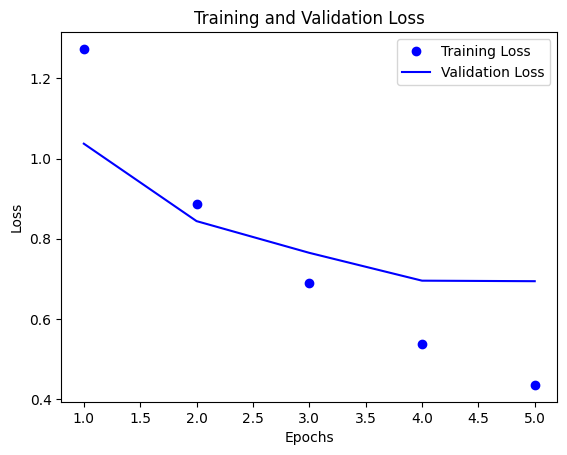

In [33]:
import matplotlib.pyplot as plt

def plot_loss(model_history): # change it up this time? no?
  loss = model_history['loss']
  val_loss = model_history['val_loss']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'bo', label = 'Training Loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

# plot_loss(rnn_history_dict)
plot_loss(rnn_func_history_dict)
# seems to drop off at about epoch 3

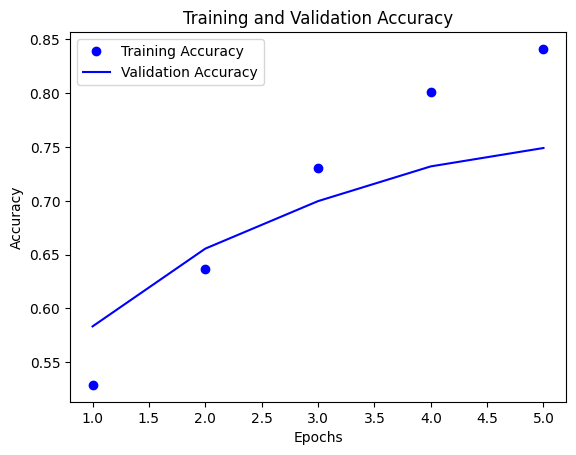

In [34]:
plt.clf() # clear the figure

def plot_accuracy(model_history):
  accuracy = model_history['accuracy']
  val_accuracy = model_history['val_accuracy']

  epochs = range(1, len(accuracy) + 1)

  plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

# plot_accuracy(rnn_history_dict)
plot_accuracy(rnn_func_history_dict)
# seems to drop off at about epoch 3

In [35]:
# test_eval = rnn_model.evaluate(X_test_rnn, y_test_rnn) # output is [0.0, 0.05001423507928848]
test_eval = rnn_model_func_api.evaluate(X_test_rnn, y_test_rnn) # output is [0.0, 0.05001423507928848]
print("Test!:\n")
print(test_eval)

330/330 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7609 - loss: 0.6676
Test!:

[0.6603327393531799, 0.7561924457550049]


In [36]:
# predict probabilities for test set (?) https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
y_pred_rnn = rnn_model_func_api.predict(X_test_rnn, verbose = 0)
# predict crisp classes for test set (?)
# y_pred_rnn_classes = rnn_model_func_api.predict_classes(X_test_rnn, verbose = 0)
# https://github.com/keras-team/keras/issues/15838
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis = 1) # wow it worked

# Take the above and turn them into 1D arrays instead of 2D so they work with the metric score calculation functions
# y_pred_rnn = y_pred_rnn[:, 0] # syntax? do i need to do this one since I only use y_pred_rnn_classes below?
# y_pred_rnn_classes = y_pred_rnn_classes[:, 0]

# Convert y_test_rnn to a multiclass format like y_pred_rnn_classes
# to prevent a "multilabel-indicator and multiclass targets" error
y_test_rnn_classes = np.argmax(y_test_rnn, axis=1) # Convert to the same format as y_pred_rnn_classes

acc_rnn = accuracy_score(y_test_rnn_classes, y_pred_rnn_classes)
f1_rnn = f1_score(y_test_rnn_classes, y_pred_rnn_classes, average="weighted") # f1 score, using average = 'weighted' because the target is multiclass
prec_rnn = precision_score(y_test_rnn_classes, y_pred_rnn_classes, average="weighted") # precision
recall_rnn = recall_score(y_test_rnn_classes, y_pred_rnn_classes, average="weighted") # recall

# y_pred_rnn = rnn_model_func_api.predict(X_test_rnn)
# acc_rnn = accuracy_score(y_test_rnn, y_pred_rnn)
# f1_rnn = f1_score(y_test_rnn, y_pred_rnn, average="weighted") # f1 score, using average = 'weighted' because the target is multiclass
# prec_rnn = precision_score(y_test_rnn, y_pred_rnn, average="weighted") # precision
# recall_rnn = recall_score(y_test_rnn, y_pred_rnn, average="weighted") # recall

print("Recurrent Neural Network:\n")
print("Accuracy:", acc_rnn) # matches what test_eval got above, yay
print("F1 Score:", f1_rnn)
print("Precision:", prec_rnn)
print("Recall:", recall_rnn)

Recurrent Neural Network:

Accuracy: 0.7561924646483819
F1 Score: 0.7501529842505784
Precision: 0.7632903226000752
Recall: 0.7561924646483819


<Figure size 640x480 with 0 Axes>

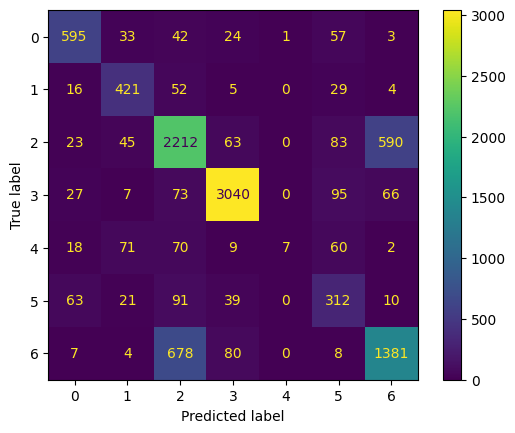

In [37]:
plt.clf()
rnn_matrix = confusion_matrix(y_test_rnn_classes, y_pred_rnn_classes)

rnn_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = rnn_matrix)

rnn_matrix_plot.plot()

plt.show()